# 1. Extract the Eigenfrequencies from a FD Simulation

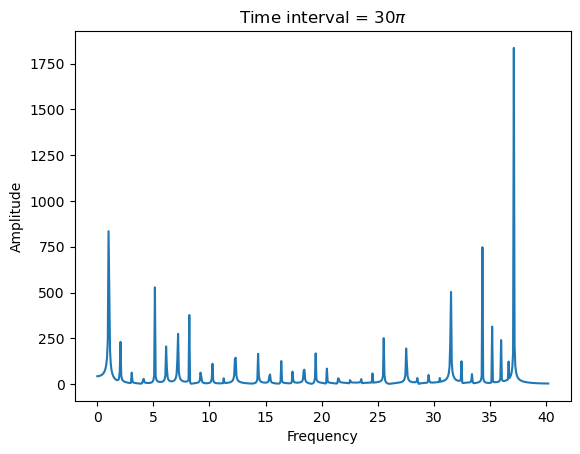

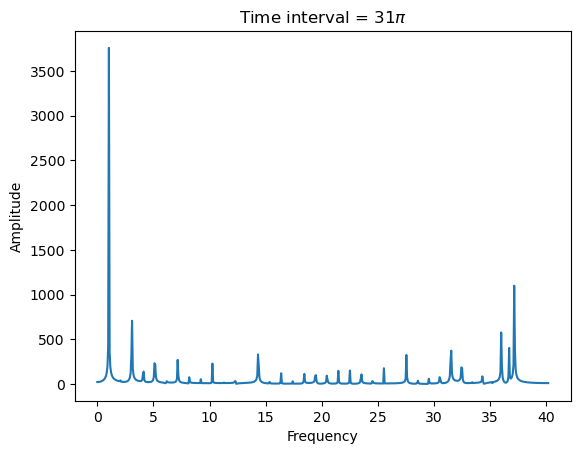

In [1]:
import numpy as np
import scipy as sp
import math as math
import matplotlib.pyplot as plt

#  --------------------------------------------------------------
#  Time step 1D wave equation using two time-levels f0 & f1
#  --------------------------------------------------------------
#  function [omega, s1, s2] = Wave1D(a, time, nx)
# 
#  Arguments:
#     a     = the length of the interval
#     time  = the total time interval for the simulation
#     nx    = the number of subintervals in the domain (0,a)
#  Returns:
#     omega = the angular frequencies
#     s1    = the complex Fourier transform of data at x = a/5
#     s2    = the complex Fourier transform of data at x = a/2

def Wave1D(a, time, nx):
    f0         = np.random.randn(nx) # Initialize with random numbers
    f0[0]    = 0              # Boundary condition at x = 0
    f0[nx-1]   = 0              # Boundary condition at x = a

    f1         = np.random.randn(nx) # Initialize with random numbers
    f1[0]    = 0              # Boundary condition at x = 0
    f1[nx-1]   = 0              # Boundary condition at x = a

    dx         = a/nx           # The cell size 
    d2tmax     = 1.99*dx         # The time step must satisfy
                                 # 2*dt < 2*dx for stability

    ntime = np.int64(time/d2tmax + 1)  # The number of time steps
    dt = time/(2*ntime)             # The time step

    # Initialize the coefficient matrix for updating the solution f

    A = np.zeros((nx,nx))
    for i in range(1,nx-1):
      A[i,i]   = 2*(1-(dt/dx)**2)    # Diagonal entries
      A[i,i+1] = (dt/dx)**2          # Upper diagonal entries
      A[i,i-1] = (dt/dx)**2          # Lower diagonal entries



    sign1 = np.zeros(2*ntime)
    sign2 = np.zeros(2*ntime)

    # Time step and sample the solution
    # Sample location #1 is close to the left boundary
    # Sample location #2 is at the midpoint of the domain
    for itime in range(0,ntime): # Every 'itime' means two time steps 'dt'

      f0               = A@f1 - f0          # Update
      sign1[2*itime-1] = f0[np.int64(1+nx/5)]  # Sample at location #1
      sign2[2*itime-1] = f0[np.int64(1+nx/2)]  # Sample at location #2


      f1               = A@f0 - f1          # Update               
      sign1[2*itime]   = f1[np.int64(1+nx/5)]  # Sample at location #1
      sign2[2*itime]   = f1[np.int64(1+nx/2)]  # Sample at location #2


    # Compute the discrete Fourier transform of 
    # the time-domain signals
    spectr1     = np.fft.fft(sign1) 
    spectr2     = np.fft.fft(sign2)

    # In the MATLAB implementation of the function fft(), 
    # the first half of the output corresponds to positive frequency
    s1 = spectr1[0:ntime] 
    s2 = spectr2[0:ntime]

    # Frequency vector for use with 's1' and 's2'
    omega       = (2*np.pi/time)*np.linspace(0, ntime-1, ntime)
    return omega, s1, s2


omega_30, s1_30, s2_30 = Wave1D(math.pi,math.pi*30,40)
omega_31, s1_31, s2_31 = Wave1D(math.pi,math.pi*31,40)

plt.plot(omega_30, abs(s2_30), "-")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title(r"Time interval = 30$\pi$")
plt.show()
plt.plot(omega_31, abs(s2_31), "-")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title(r"Time interval = 31$\pi$")
plt.show()


**1.1. Use the 1D Maxwell solver to calculate eigenfrequencies in the time domain for a simulation 30pi long and 31pi long in time. What are the differences between the results? What is the reason? Check the textbook Section 4.4.3.**



When running the simulation for the time interval 30pi, the highest amplitude tends to be lower, when compared with the interval 31pi. However, the subsequent peaks tend to be higher for the interval 30pi. This seems reasonable, as more of those modes will have completed an integer number of wave periods. Contrast this with 31, which is a prime number. There, modes 1 and 31 are the lowest methods having completed an integer number of wave periods.

**1.2. Use the Python code (MATLAB: code Download code) using two different time steps dt: d2tmax = 1.9dx and d2tmax = 3.0dx?**

When running the code using d2tmax = 3.0dx, errors were created causing the plotting to fail. Instead, using d2tmax = 2.01dx, which is smaller but still outside of the stability condition. The plot looks like an increasing curve with no discernible peaks, see figure below. The case with d2tmax=1.99dx is stable and was plotted in the previous exercise.

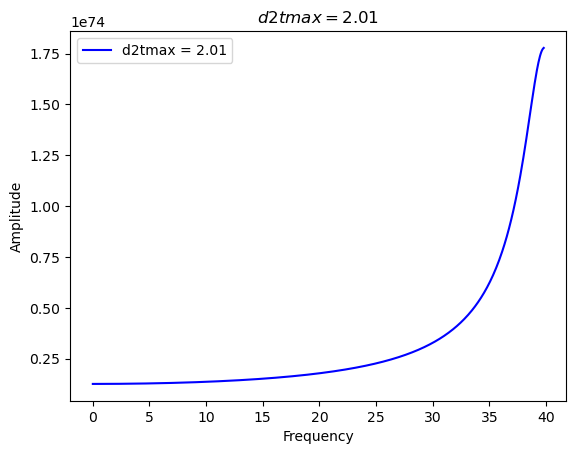

In [2]:
def Wave1D(a, time, nx, d2tmax_factor):
    f0         = np.random.randn(nx) # Initialize with random numbers
    f0[0]    = 0              # Boundary condition at x = 0
    f0[nx-1]   = 0              # Boundary condition at x = a

    f1         = np.random.randn(nx) # Initialize with random numbers
    f1[0]    = 0              # Boundary condition at x = 0
    f1[nx-1]   = 0              # Boundary condition at x = a

    dx         = a/nx           # The cell size 
    d2tmax     = d2tmax_factor*dx         # The time step must satisfy
                                 # 2*dt < 2*dx for stability

    ntime = np.int64(time/d2tmax + 1)  # The number of time steps
    dt = time/(2*ntime)             # The time step

    # Initialize the coefficient matrix for updating the solution f

    A = np.zeros((nx,nx))
    for i in range(1,nx-1):
      A[i,i]   = 2*(1-(dt/dx)**2)    # Diagonal entries
      A[i,i+1] = (dt/dx)**2          # Upper diagonal entries
      A[i,i-1] = (dt/dx)**2          # Lower diagonal entries



    sign1 = np.zeros(2*ntime)
    sign2 = np.zeros(2*ntime)

    # Time step and sample the solution
    # Sample location #1 is close to the left boundary
    # Sample location #2 is at the midpoint of the domain
    for itime in range(0,ntime): # Every 'itime' means two time steps 'dt'

      f0               = A@f1 - f0          # Update
      sign1[2*itime-1] = f0[np.int64(1+nx/5)]  # Sample at location #1
      sign2[2*itime-1] = f0[np.int64(1+nx/2)]  # Sample at location #2


      f1               = A@f0 - f1          # Update               
      sign1[2*itime]   = f1[np.int64(1+nx/5)]  # Sample at location #1
      sign2[2*itime]   = f1[np.int64(1+nx/2)]  # Sample at location #2


    # Compute the discrete Fourier transform of 
    # the time-domain signals
    spectr1     = np.fft.fft(sign1) 
    spectr2     = np.fft.fft(sign2)

    # In the MATLAB implementation of the function fft(), 
    # the first half of the output corresponds to positive frequency
    s1 = spectr1[0:ntime] 
    s2 = spectr2[0:ntime]

    # Frequency vector for use with 's1' and 's2'
    omega       = (2*np.pi/time)*np.linspace(0, ntime-1, ntime)
    return omega, s1, s2

omega_30, s1_30, s2_30 = Wave1D(math.pi,math.pi*30,40, 2.01)

plt.plot(omega_30, abs(s1_30), "b", label="d2tmax = 2.01")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title(r"$d2tmax = 2.01$")
plt.legend()
plt.show()

**1.2.b) Answer the question: What is the stability condition for this numerical scheme? Check the lecture and textbook sections 4.4.1 and 4.4.2**

The type of stability condition for this kind of numerical scheme is called a Courant condition. For this particular scheme, it is this formula:
$$
\Delta t \leq \frac{2}{|\omega_{max}|},
$$
where max is the largest eigenmode. For our scheme, the largest numerical eigenvalue is $\omega^2_{max}=\frac{4}{h^2}$ where h is the cell size in our discretization. This makes sense as we are not able to simulate beyond the resolution. Using those two expressions, we can determine that the condition that must hold for stability is that $\omega_{max} \leq h$. 

# 2. The FDTD Method - Implement a Python Code with a Gaussian Pulse

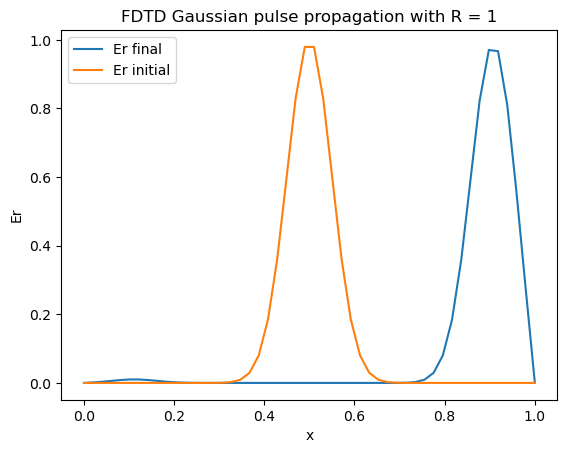

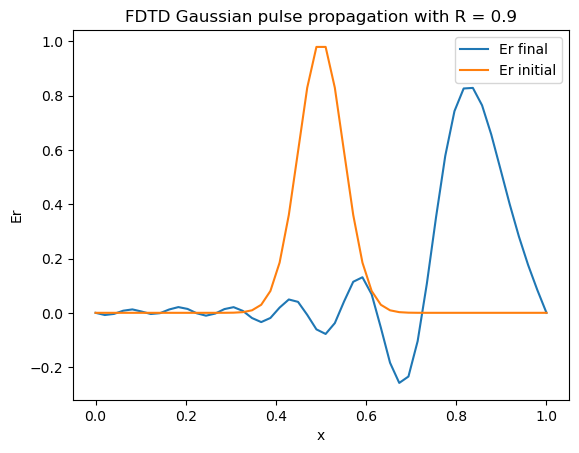

In [3]:
def FDTD(R):
    a = 1 # length simulation box
    pulse_width = 0.05
    nx = 50 # number of grid points
    dx = a/nx # grid spacing
    dt = R*dx # time step
    c = 1 # speed of light in vacuum

# number of time steps
    nt = 1000

    xn = np.linspace(0,a,nx)

# initialize Er
    Er0 = np.zeros(nx)
    Er1 = np.zeros(nx)
    Er  = np.zeros(nx)

# Gaussian Pulse
    Er0 = np.exp(-((xn - a/2)**2) / (2 * pulse_width**2))
    Er1 = np.exp(-((xn - (a/2 + c * dt))**2) / (2 * pulse_width**2))
    Er_initial = Er0.copy()
    for it in range(1,nt):
  # bc 
      Er[0] = 0.0
      Er[-1] = 0.0 
      for ix in range(1,nx-1):
        Er[ix] = 2.0*Er1[ix] - Er0[ix] + (c*dt/dx)* (c*dt/dx)* (Er1[ix-1] -2*Er1[ix] + Er1[ix+1])

      Er0[:] = Er1[:]
      Er1[:] = Er[:]
    return xn,Er,Er_initial

xn_1, Er_1, Er_1_initial = FDTD(R=1)
xn_09, Er_09, Er_09_initial = FDTD(R=0.9)
  
plt.plot(xn_1,Er_1, label='Er final')
plt.plot(xn_1,Er_1_initial, label='Er initial')
plt.xlabel("x")
plt.ylabel("Er")
plt.title("FDTD Gaussian pulse propagation with R = 1")
plt.legend()
plt.show()

plt.plot(xn_09,Er_09, label='Er final')
plt.plot(xn_09,Er_09_initial, label='Er initial')
plt.xlabel("x")
plt.ylabel("Er")
plt.title("FDTD Gaussian pulse propagation with R = 0.9")
plt.legend()
plt.show()

**Answer the following question: What is the impact of not using the magic time-step, and why is the simulation affected?**

The impact of using the magic time step is that the wave propagation speed combined with the cell size means that a wave will propagate at exactly 1 cell per time step. 
If the propagation is faster than this, it will be unstable since each cell only considers their direct neighbor. If the propagation is slower, like for the second case in this exercise numerical dispersion will occur. This, since part of the wave does not propagate, and this will cause the shape of the wave to deteriorate over time. 


# 3. Develop a Python Code to Simulate a 3D Cavity with PEC BC

Imports and constants:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps0 = 8.8541878e-12;         # Permittivity of vacuum
mu0  = 4e-7 * np.pi;          # Permeability of vacuum
c0   = 299792458;             # Speed of light in vacuum

Lx = .05; Ly = .04; Lz = .03; # Cavity dimensions in meters
Nx =  25; Ny =  20; Nz =  15; # Number of cells along each axis
Nt = 8192;                    # Number of time steps

dx = Lx/Nx; dy = Ly/Ny; dz = Lz/Nz; # Discretization steps

Courant Condition: This is used to ensure that the simulation is stable. The Courant condition is given by:
$$ 
R = \frac{v \Delta t}{\Delta x} \leq 1
$$
where $v$ is the speed of light in the medium, $\Delta t$ is the time step, and $\Delta x$ is the spatial step. The Courant condition ensures that the information does not travel more than one cell per time step.
In the case of the 3D cavity, the Courant condition is given by:
$$
R = c \Delta t \sqrt{\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} + \frac{1}{\Delta z^2}} \leq 1 
$$
where $c$ is the speed of light in the medium, $\Delta t$ is the time step, and $\Delta x$ is the spatial step.

Therefore, the limit imposed by the Courant condition is on the time step is given by:
$$
\Delta t \leq \frac{1}{c \sqrt{\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} + \frac{1}{\Delta z^2}}}
$$

In [5]:
def CourantCondition(dx, dy, dz):
    dt = 1 / (np.sqrt(1/dx**2 + 1/dy**2 + 1/dz**2)* c0)
    return dt

In [6]:
dt = CourantCondition(dx, dy, dz)
print('Courant condition satisfied: dt =', dt, 's')

Courant condition satisfied: dt = 3.851666403092941e-12 s


Initialization of the fiels and imposing the boundary conditions. In this case we are considering the case of a perfect electric conductor (PEC) boundary condition. The PEC boundary condition is given by:
$$
n \times E = 0
$$
where $n$ is the normal vector to the boundary and $E$ is the electric field. This condition is implemented by setting the tangential component of the electric field to zero at the boundary.
This means that in the boundary conditions for the magnetic field are that the normal component of the magnetic field is zero at the boundary.

In [7]:
Ex = np.random.rand(Nx, Ny+1, Nz+1)
Ey = np.random.rand(Nx+1, Ny, Nz+1)
Ez = np.random.rand(Nx+1, Ny+1, Nz)

Hx = np.random.rand(Nx+1, Ny, Nz)
Hy = np.random.rand(Nx, Ny+1, Nz)
Hz = np.random.rand(Nx, Ny, Nz+1)

# perfect electric conductor boundary conditions
Ex[:, 0, :] = 0
Ex[:, -1, :] = 0
Ex[:, :, 0] = 0
Ex[:, :, -1] = 0
Ey[0, :, :] = 0
Ey[-1, :, :] = 0
Ey[:, :, 0] = 0
Ey[:, :, -1] = 0
Ez[0, :, :] = 0
Ez[-1, :, :] = 0
Ez[:, 0, :] = 0
Ez[:, -1, :] = 0

Hx[0, :, :] = 0
Hx[-1, :, :] = 0
Hy[:, 0, :] = 0
Hy[:, -1, :] = 0
Hz[:, :, 0] = 0
Hz[:, :, -1] = 0

In [8]:
(Nx//2)*dx, (Ny//2)*dy, (Nz//2)*dz

(0.024, 0.02, 0.014)

## 3D FDTD Maxwell solver

The 3D FDTD Maxwell solver updates the electric and magnetic fields in the 3D space at each time step. By taking the boundary conditions of the electric field into consideration we are also satisfying the boundary conditions of the magnetic field. Therefore, we update the electric field at all grid points except the boundary points and update the magnetic field at all grid points.
We also initialize the arrays e1, e2, e3, h1, h2, and h3 to store the electric and magnetic fields at the sampling point (12, 10, 7), corresponding to the point in the center of the cavity, in real space, (0.024, 0.02, 0.014).

In [9]:
e1 = np.zeros(Nt)
e2 = np.zeros(Nt)
e3 = np.zeros(Nt)
h1 = np.zeros(Nt)
h2 = np.zeros(Nt)
h3 = np.zeros(Nt)

for t in range(Nt):
    
    Ex[:,1:Ny,1:Nz] = Ex[:, 1:Ny, 1:Nz] + (dt /eps0) * ((Hz[:, 1:Ny, 1:Nz] - Hz[:, :Ny-1, 1:Nz])/dy - (Hy[:, 1:Ny, 1:Nz] - Hy[:, 1:Ny, :Nz-1])/dz)
    Ey[1:Nx, :, 1:Nz] = Ey[1:Nx, :, 1:Nz] + (dt /eps0) * ((Hx[1:Nx, :, 1:Nz] - Hx[1:Nx, :, :Nz-1])/dz - (Hz[1:Nx, :, 1:Nz] - Hz[:Nx-1, :, 1:Nz])/dx)
    Ez[1:Nx, 1:Ny, :] = Ez[1:Nx, 1:Ny, :] + (dt /eps0) * ((Hy[1:Nx, 1:Ny, :] - Hy[:Nx-1, 1:Ny, :])/dx - (Hx[1:Nx, 1:Ny, :] - Hx[1:Nx, :Ny-1, :])/dy)
    
    Hx = Hx + (dt/mu0) * ((Ey[:, :, 1:Nz+1] - Ey[:, :, :Nz])/dz - (Ez[:, 1:Ny+1, :] - Ez[:, :Ny, :])/dy)
    Hy = Hy + (dt/mu0) * ((Ez[1:Nx+1, :, :] - Ez[:Nx, :, :])/dx - (Ex[:, :, 1:Nz+1] - Ex[:, :, :Nz])/dz)
    Hz = Hz + (dt/mu0) * ((Ex[:, 1:Ny+1, :] - Ex[:, :Ny, :])/dy - (Ey[1:Nx+1, :, :] - Ey[:Nx, :, :])/dx)
    
    e1[t] = Ex[Nx//2, Ny//2, Nz//2]
    e2[t] = Ey[Nx//2, Ny//2, Nz//2]
    e3[t] = Ez[Nx//2, Ny//2, Nz//2]
    h1[t] = Hx[Nx//2, Ny//2, Nz//2]
    h2[t] = Hy[Nx//2, Ny//2, Nz//2]
    h3[t] = Hz[Nx//2, Ny//2, Nz//2]


e1_fft = np.fft.fft(e1)
e2_fft = np.fft.fft(e2)
e3_fft = np.fft.fft(e3)
h1_fft = np.fft.fft(h1)
h2_fft = np.fft.fft(h2)
h3_fft = np.fft.fft(h3)



<Figure size 640x480 with 0 Axes>

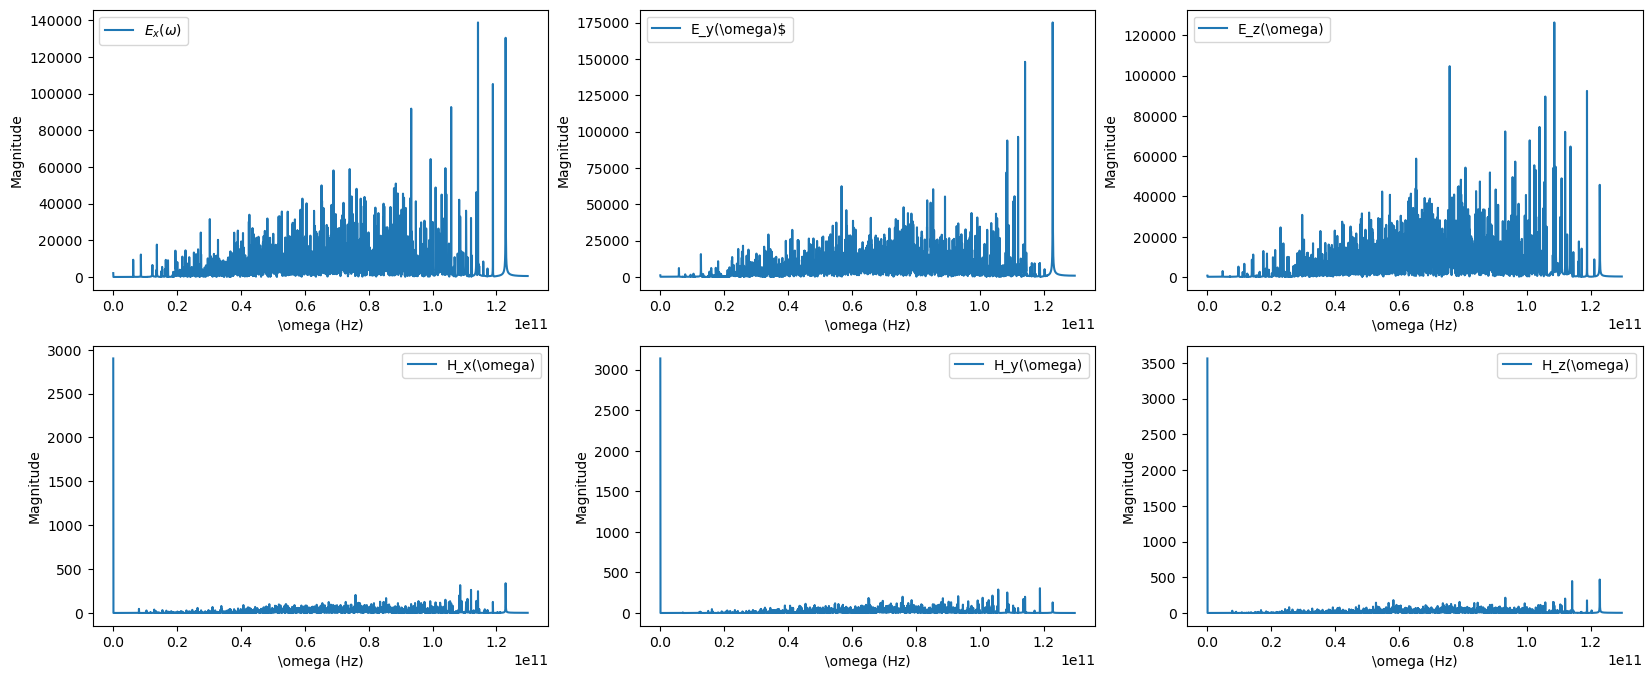

In [10]:
omega = np.fft.fftfreq(Nt, d=dt)

#plot only the positive frequencies
plt.figure()
plt.figure(figsize=(20, 8))
plt.subplot(231)
plt.plot(omega[:Nt//2], np.abs(e1_fft[:Nt//2]), label=r'$E_x(\omega)$')
plt.xlabel(r'\omega (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(232)
plt.plot(omega[:Nt//2], np.abs(e2_fft[:Nt//2]), label=r'E_y(\omega)$')
plt.xlabel(r'\omega (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(233)
plt.plot(omega[:Nt//2], np.abs(e3_fft[:Nt//2]), label=r'E_z(\omega)')
plt.xlabel(r'\omega (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(234)
plt.plot(omega[:Nt//2], np.abs(h1_fft[:Nt//2]), label=r'H_x(\omega)')
plt.xlabel(r'\omega (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(235)
plt.plot(omega[:Nt//2], np.abs(h2_fft[:Nt//2]), label=r'H_y(\omega)')
plt.xlabel(r'\omega (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(236)
plt.plot(omega[:Nt//2], np.abs(h3_fft[:Nt//2]), label=r'H_z(\omega)')
plt.xlabel(r'\omega (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

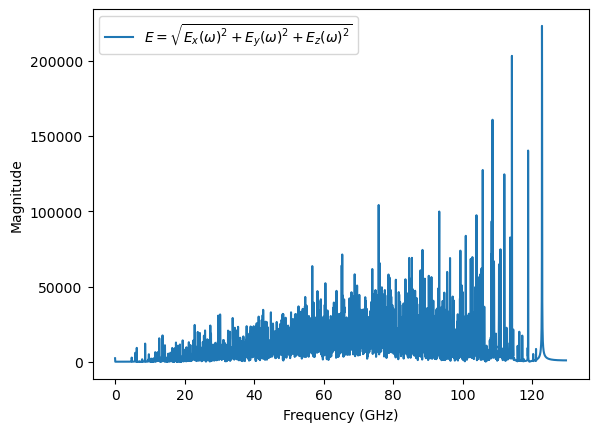

In [11]:
# sum of Ex and Ey and Ez
E = np.sqrt(e1_fft**2 + e2_fft**2 + e3_fft**2)

plt.plot(omega[:Nt//2]/1e9, np.abs(E[:Nt//2]), label=r"$E = \sqrt{E_x(\omega)^2 + E_y(\omega)^2 + E_z(\omega)^2}$")
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()



**3.1 Select a point within the domain and record the evolution of the electric field. Perform a spectral analysis (FFT) of the electric field evolution.**
- **How do you initialize the fields?**

The fields are initialized using random values in all grid points (in the grid and half grid points), and afterward the boundary conditions are imposed. The PEC boundary conditions are that the tangential component of the electric field and the normal components of the magnetic field are zero at the boundary.

- **How do you choose the time step?**

The time step is choosen based on the Courant condition. The Courant condition ensures that the information does not travel more than one cell per time step. In the case of the 3D cavity, the Courant condition is given by:
$$
R = c \Delta t \sqrt{\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} + \frac{1}{\Delta z^2}} \leq 1
$$
where $c$ is the speed of light in the medium, $\Delta t$ is the time step, and $\Delta x$ is the spatial step.
In our case we are defining $\Delta t$ such that R = 1, also know as the magic step.

- **How do you choose the sampling points?**

The sampling points choosen are the center of the cavity, in real space, (0.024, 0.02, 0.014). This point is choosen to record the electric and magnetic fields at each time step. We decided to use this point to record the fields because it is in the center of the cavity and it is a point where the fields are expected to be more stable, without interference from the boundaries.

# 4. Use MEEP to model a bent waveguide

In [12]:
import meep as mp
from IPython.display import Video

Create the waveguide with a 90º bend, the source and define the simulation.

In [13]:
cell = mp.Vector3(16, 40, 0)
geometry = [
    mp.Block(
        mp.Vector3(12, 1, mp.inf),
        center=mp.Vector3(-2.5, -3.5),
        material=mp.Medium(epsilon=12),
    ),
    mp.Block(
        mp.Vector3(1, 42, mp.inf),
        center=mp.Vector3(3.5, 17),
        material=mp.Medium(epsilon=12),
    ),
]
pml_layers = [mp.PML(1.0)]
resolution = 10

sources = [
    mp.Source(
        mp.ContinuousSource(wavelength=2 * (11**0.5), width=20),
        component=mp.Ez,
        center=mp.Vector3(-7, -3.5),
        size=mp.Vector3(0, 1),
    )
]



sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    geometry_center=mp.Vector3(0, 12, 0)
)

Create an Animate2D object to visualize the simulation later and run the simulation.

-----------
Initializing structure...
time for choose_chunkdivision = 0.00102687 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.113902 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Meep progress: 50.0/400.0 = 12.5% done in 4.0s, 28.0s to go
on time step 1000 (time=50), 0.00400071 s/step
Meep progress: 99.0/400.0 = 24.8% done in 8.0s, 24.4s to go
on time step 1980 (time=99), 0.00411148 s/step
Meep progress: 140.0/400.0 = 35.0% done in 12.0s, 22.4s to go
on time step 2800 (time=140), 0.00491095 s/step
Meep progress: 186.0/400.0 = 46.5% done in 16.1s, 18.5s to go
on time step 3720 (time=186), 0.0044078 s/step
Meep progress: 229.0/400.0 = 57.2% done in 20.2s, 15.1s to go
on time step 4580 (time=229), 0.00476739 s/step
Meep progress: 273.0/400.0 = 68.2% done in 24.2s, 11.3s to go
on time step 5460 (time=273), 0.00456077 s/step
Meep progress: 320.0/4

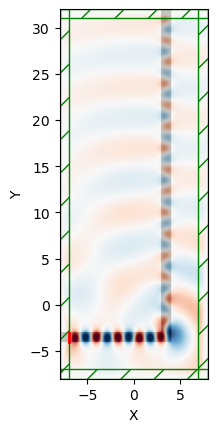

In [14]:
animate = mp.Animate2D(fields=mp.Ez)
sim.run(mp.at_every(1, animate), until=400)

Plot of $E_z$ value at time = 400.

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


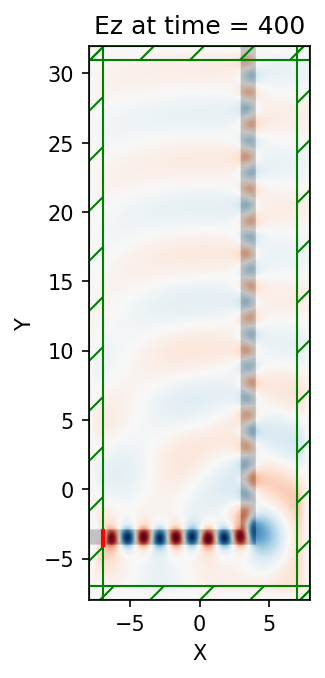

In [15]:
plt.figure(dpi=150)
sim.plot2D(fields=mp.Ez)
plt.title("Ez at time = 400")
plt.show()

Video animation of $E_z$ during the simulated time.

In [16]:
# animate.to_jshtml(10)

# B.1 MEEP to model a 3D Cavity with PEC BC

In [17]:
cell_B1 = mp.Vector3(12, 12, 12)
geometry_B1 = [mp.Block(mp.Vector3(12, 12, 12), center=mp.Vector3(0, 0, 0), material=mp.Medium(epsilon=1))]
resolution = 10

sim_B1 = mp.Simulation(cell_size=cell_B1, geometry=geometry_B1, resolution=resolution)

from random import random
from random import seed
seed(1)
def field_func(p):
    rr = random() - 0.5
    return rr

sim_B1.initialize_field(mp.Ex, field_func)
sim_B1.initialize_field(mp.Ey, field_func)
sim_B1.initialize_field(mp.Ez, field_func)

-----------
Initializing structure...
time for choose_chunkdivision = 1.50204e-05 s
Working in 3D dimensions.
Computational cell is 12 x 12 x 12 with resolution 10
     block, center = (0,0,0)
          size (12,12,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 7.94972 s
-----------


In [18]:
Ex = []
Ey = []
Ez = []

def print_field(sim):
    fpx = sim_B1.get_field_point(mp.Ex, mp.Vector3(0,0,0)).real
    Ex.append(fpx)
    fpy = sim_B1.get_field_point(mp.Ey, mp.Vector3(0,0,0)).real
    Ey.append(fpy)
    fpz = sim_B1.get_field_point(mp.Ez, mp.Vector3(0,0,0)).real
    Ez.append(fpz)
sim_B1.run(mp.after_time(0, print_field), until=200)

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 11.850000000000001/200.0 = 5.9% done in 4.0s, 63.6s to go
on time step 237 (time=11.85), 0.0168832 s/step
Meep progress: 24.650000000000002/200.0 = 12.3% done in 8.0s, 57.0s to go
on time step 493 (time=24.65), 0.0156722 s/step
Meep progress: 38.75/200.0 = 19.4% done in 12.0s, 50.1s to go
on time step 775 (time=38.75), 0.0142171 s/step
Meep progress: 52.95/200.0 = 26.5% done in 16.0s, 44.5s to go
on time step 1059 (time=52.95), 0.0141156 s/step
Meep progress: 66.3/200.0 = 33.1% done in 20.0s, 40.4s to go
on time step 1326 (time=66.3), 0.0150075 s/step
Meep progress: 80.45/200.0 = 40.2% done in 24.0s, 35.7s to go
on time step 1609 (time=80.45), 0.0141397 s/step
Meep progress: 94.7/200.0 = 47.4% done in 28.1s, 31.2s to go
on time step 1894 (time=94.7), 0.0140634 s/step
Meep progress: 108.9/200.0 = 54.5% done in 32.1s, 26.8s to go
on time step 2178 (time=108.9), 0.0140911 s/step
Meep progress: 122.25/200.0 = 61.1% done in 36.1s, 22.9s to go
on time step 2445 (time=122.25), 

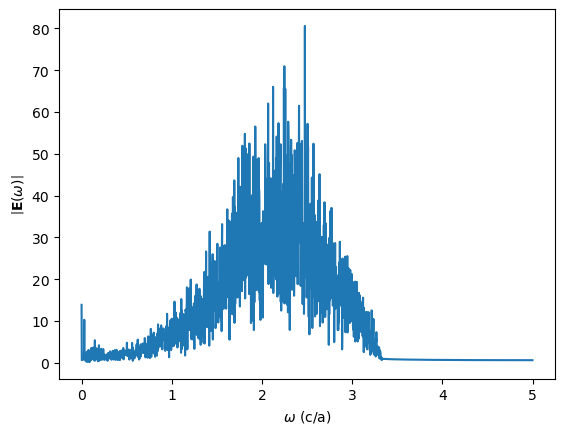

In [19]:
Ex = np.array(Ex)
Ey = np.array(Ey)
Ez = np.array(Ez)

Ex_fft = np.fft.fft(Ex)
Ey_fft = np.fft.fft(Ey)
Ez_fft = np.fft.fft(Ez)

omega = np.fft.fftfreq(Ex.size, sim.meep_time()/Ex.size)

E_fft = np.sqrt(Ex_fft**2 + Ey_fft**2 + Ez_fft**2)

# plot only the positive frequencies
plt.plot(omega[:Ex.size//2], np.abs(E_fft[:Ex.size//2]))
plt.xlabel(r'$\omega$ (c/a)')
plt.ylabel(r'$\left| \mathbf{E}(\omega) \right|$')
plt.show()

# B.2 Use MEEP to model a Dipole Antenna

     block, center = (0,0,0)
          size (1,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


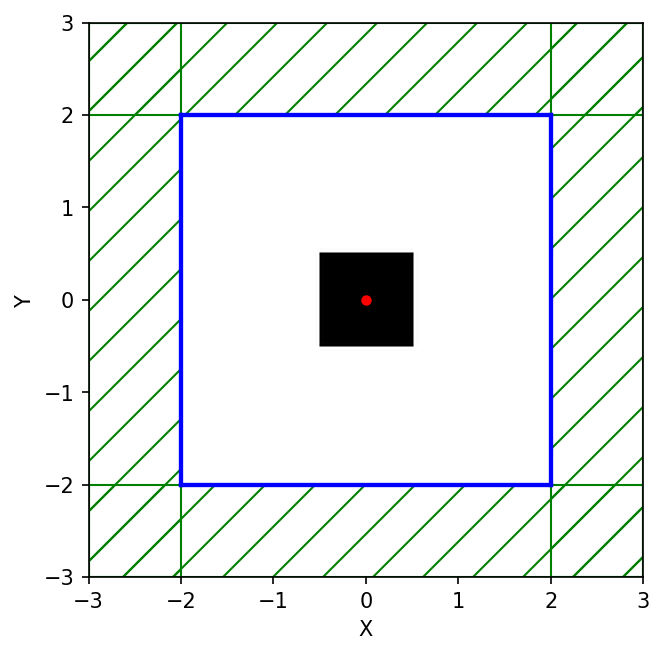

In [20]:
resolution = 50  # pixels/μm

sxy = 4
dpml = 1
cell = mp.Vector3(sxy + 2 * dpml, sxy + 2 * dpml)

pml_layers = [mp.PML(dpml)]

fcen = 1.0
df = 0.4
src_cmpt = mp.Ey
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), center=mp.Vector3(), component=src_cmpt)]

if src_cmpt == mp.Ex:
    symmetries = [mp.Mirror(mp.X, phase=-1), mp.Mirror(mp.Y, phase=+1)]
elif src_cmpt == mp.Ey:
    symmetries = [mp.Mirror(mp.X, phase=+1), mp.Mirror(mp.Y, phase=-1)]
elif src_cmpt == mp.Ez:
    symmetries = [mp.Mirror(mp.X, phase=+1), mp.Mirror(mp.Y, phase=+1)]
    
# ADDED GEOMETRY TO OBTAIN THE REQUIRED DESIGN
geometry = [mp.Block(mp.Vector3(1, 1), center=mp.Vector3(), material=mp.Medium(epsilon=12))]

sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    sources=sources,
    symmetries=symmetries,
    boundary_layers=pml_layers,
    geometry=geometry,
)

nearfield_box = sim.add_near2far(
    fcen,
    0,
    1,
    mp.Near2FarRegion(mp.Vector3(y=0.5 * sxy), size=mp.Vector3(sxy)),
    mp.Near2FarRegion(mp.Vector3(y=-0.5 * sxy), size=mp.Vector3(sxy), weight=-1),
    mp.Near2FarRegion(mp.Vector3(0.5 * sxy), size=mp.Vector3(y=sxy)),
    mp.Near2FarRegion(mp.Vector3(-0.5 * sxy), size=mp.Vector3(y=sxy), weight=-1),
)

flux_box = sim.add_flux(
    fcen,
    0,
    1,
    mp.FluxRegion(mp.Vector3(y=0.5 * sxy), size=mp.Vector3(sxy)),
    mp.FluxRegion(mp.Vector3(y=-0.5 * sxy), size=mp.Vector3(sxy), weight=-1),
    mp.FluxRegion(mp.Vector3(0.5 * sxy), size=mp.Vector3(y=sxy)),
    mp.FluxRegion(mp.Vector3(-0.5 * sxy), size=mp.Vector3(y=sxy), weight=-1),
)

f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

In [21]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, src_cmpt, mp.Vector3(), 1e-8))

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00168085 s
Working in 2D dimensions.
Computational cell is 6 x 6 x 0 with resolution 50
     block, center = (0,0,0)
          size (1,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0322158 s
-----------
field decay(t = 50.01): 25.542280228561836 / 25.542280228561836 = 1.0
field decay(t = 100.01): 0.038095208095834325 / 25.542280228561836 = 0.0014914568219808182
field decay(t = 150.02): 0.010402708473373108 / 25.542280228561836 = 0.0004072740718638195
field decay(t = 200.03): 0.0008898913280579111 / 25.542280228561836 = 3.483993285230731e-05
on time step 24339 (time=243.39), 0.000164351 s/step
field decay(t = 250.04): 0.00011517345816181448 / 25.542280228561836 = 4.509129847891397e-06
field decay(t = 300.04): 2.8990700833002138e-05 / 25.5422802

In [22]:
near_flux = mp.get_fluxes(flux_box)[0]

In [23]:
r = (1000 / fcen)  # half side length of far-field square box OR radius of far-field circle
res_ff = 1  # resolution of far fields (points/μm)
far_flux_box = (nearfield_box.flux(mp.Y, mp.Volume(center=mp.Vector3(y=r), size=mp.Vector3(2 * r)), res_ff)[0]
    - nearfield_box.flux(mp.Y, mp.Volume(center=mp.Vector3(y=-r), size=mp.Vector3(2 * r)), res_ff)[0]
    + nearfield_box.flux(mp.X, mp.Volume(center=mp.Vector3(r), size=mp.Vector3(y=2 * r)), res_ff)[0]
    - nearfield_box.flux(mp.X, mp.Volume(center=mp.Vector3(-r), size=mp.Vector3(y=2 * r)), res_ff)[0])

In [24]:
npts = 100  # number of points in [0,2*pi) range of angles
angles = 2 * math.pi / npts * np.arange(npts)

E = np.zeros((npts, 3), dtype=np.complex128)
H = np.zeros((npts, 3), dtype=np.complex128)
for n in range(npts):
    ff = sim.get_farfield(nearfield_box, mp.Vector3(r * math.cos(angles[n]), r * math.sin(angles[n])))
    E[n, :] = [np.conj(ff[j]) for j in range(3)]
    H[n, :] = [ff[j + 3] for j in range(3)]

Px = np.real(np.multiply(E[:, 1], H[:, 2]) - np.multiply(E[:, 2], H[:, 1]))
Py = np.real(np.multiply(E[:, 2], H[:, 0]) - np.multiply(E[:, 0], H[:, 2]))
Pr = np.sqrt(np.square(Px) + np.square(Py))

far_flux_circle = np.sum(Pr) * 2 * np.pi * r / len(Pr)

print("flux:, {:.6f}, {:.6f}, {:.6f}".format(near_flux, far_flux_box, far_flux_circle))

flux:, 0.362050, 0.362333, 0.362183


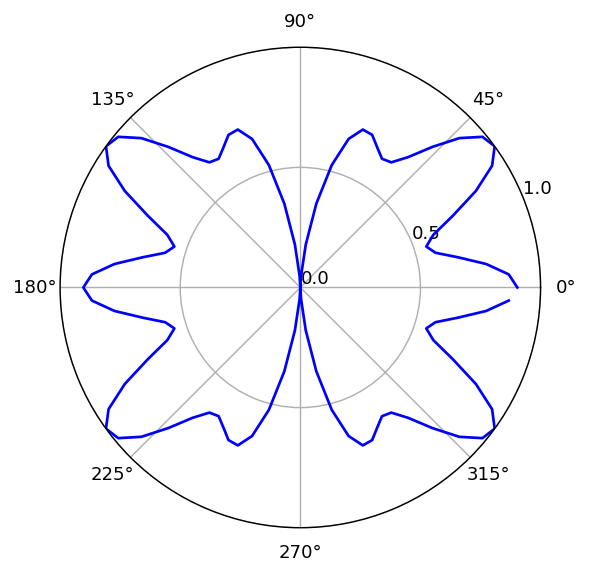

In [25]:
plt.figure(dpi=130)
ax = plt.subplot(111, projection="polar")
ax.plot(angles, Pr / max(Pr), "b-")
ax.set_rmax(1)
ax.set_rticks([0, 0.5, 1])
ax.grid(True)
ax.set_rlabel_position(22)